Nama: Riofebri Prasetia
NIM: 221911192
Kelas: 3SI1
Mata Kuliah: Data Mining Knowledge Managament

**Random forest**

In [ ]:
pip install numpy pandas matplotlib seaborn sklearn preprocessing

In [ ]:
pip install numpy model_selection

Library yang digunakan

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

**Load Data**

Data yang digunakan adalah data Status Kelengkapan Imunisasi

In [ ]:
url = 'https://raw.githubusercontent.com/rii92/datmin-tugas-akhir/main/parkinsons.csv'
df = pd.read_csv(url)
df


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Lihat info tabel dataset nya terlebih dahulu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Lakukan Preprocesing**

In [ ]:
# dapatkan beberapa informasi tiap baris
print(df)

# describe the data
df.describe()

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      198.764       396.961  ...  0.207454  2.138608  0.123306
194  phon_R01_S50_6      214.289       260.277  ...  0.190667  2.555477  0.148569

[195 rows x 24 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Sebenarnya untuk random forest dapat menghandel mising data sehingga hal ini bisa diabaikan. tapi kita coba drop baris yang mengandung null

In [ ]:
#ubah data NaN jadi np.nan
df = df.replace('NaN', np.nan)

df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# drop row NaN
df.dropna()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

ubah data set menjadi numerik. atau dilakukan pengkodean pada data kategorik

In [ ]:
df = pd.DataFrame(df)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in df.columns:
  df[x] = le.fit_transform(df[x])

df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,55,72,15,137,8,104,143,127,153,117,141,163,142,146,130,75,1,44,183,154,139,84,163
1,1,65,66,128,150,9,126,148,150,172,135,165,180,166,170,124,46,1,73,190,180,172,126,183
2,2,43,38,123,155,10,135,152,160,162,126,160,171,154,165,96,69,1,53,194,167,162,92,174
3,3,42,52,122,153,10,131,149,155,166,129,163,174,158,168,100,68,1,58,189,178,170,105,184
4,4,36,61,120,158,12,140,154,165,174,133,171,183,171,176,109,56,1,46,192,184,110,91,188
5,5,61,39,127,150,9,125,151,149,156,123,147,165,148,152,93,81,1,45,193,175,152,64,180
6,6,59,51,130,41,4,30,49,36,41,27,38,41,53,40,45,137,1,149,152,103,127,12,106
7,7,13,8,97,27,4,24,36,28,39,22,44,43,38,46,15,184,1,174,150,67,59,43,70
8,8,5,43,69,102,7,88,101,106,79,53,72,82,82,75,83,90,1,161,162,115,168,88,127
9,9,2,13,68,97,7,78,101,95,114,79,106,116,122,111,77,92,1,122,179,147,167,112,156


Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_df = pd.DataFrame(scaler.fit_transform(df))

std_df.columns = df.columns
std_df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-1.723191,-0.746124,-0.444121,-1.456718,1.052196,0.890754,0.705656,1.379236,0.754506,1.120508,1.144795,0.967354,1.294087,0.897619,0.969856,0.745620,-0.390827,0.571429,-0.941537,1.527778,1.012597,0.761587,-0.230943,1.172481
1,-1.705426,-0.568475,-0.550711,0.550711,1.319918,1.216640,1.214184,1.487457,1.204621,1.472896,1.570410,1.419217,1.607722,1.334480,1.409461,0.634049,-0.906008,0.571429,-0.426357,1.652132,1.474483,1.352331,0.515181,1.527778
2,-1.687661,-0.959302,-1.048127,0.461886,1.422888,1.542525,1.422218,1.574033,1.400323,1.287429,1.357603,1.325079,1.441680,1.116050,1.317877,0.113383,-0.497416,0.571429,-0.781654,1.723191,1.243540,1.173318,-0.088824,1.367894
3,-1.669897,-0.977067,-0.799419,0.444121,1.381700,1.542525,1.329758,1.509101,1.302472,1.361615,1.428539,1.381562,1.497028,1.188860,1.372827,0.187764,-0.515181,0.571429,-0.692829,1.634367,1.438953,1.316529,0.142119,1.545543
4,-1.652132,-1.083656,-0.639535,0.408592,1.484671,2.194297,1.537793,1.617322,1.498174,1.509989,1.523120,1.532183,1.663070,1.425493,1.519362,0.355121,-0.728359,0.571429,-0.906008,1.687661,1.545543,0.242448,-0.106589,1.616602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.652132,0.639535,0.959302,-0.390827,-0.183445,-0.412788,0.081554,-0.049282,0.108690,0.990681,1.073859,1.099148,1.091147,0.679189,1.098074,0.987358,-0.763889,-1.750000,-0.532946,-1.136951,-0.941537,-1.368672,0.994832,-0.941537
191,1.669897,1.367894,1.314599,-0.604005,0.372593,-0.412788,0.497622,0.210448,0.539234,0.322998,0.317210,0.477836,0.390081,0.060302,0.493617,0.448097,-0.888243,-1.750000,-0.728359,-0.692829,-0.586240,-1.314968,1.208010,-0.408592
192,1.687661,0.657300,1.154716,-1.510013,1.505265,1.216640,1.491563,1.400880,1.459033,0.007704,0.269920,-0.030510,-0.015800,-0.285547,-0.037573,1.601000,-1.225775,-1.750000,-1.012597,-1.208010,-1.136951,-1.082251,1.083656,-0.977067
193,1.705426,1.101421,1.545543,-1.474483,0.866850,-0.086903,0.705656,0.773198,0.754506,-0.029389,0.175339,-0.049338,-0.126495,-0.449370,-0.055890,1.470834,-0.959302,-1.750000,-0.497416,-1.421189,-1.119186,-0.222986,-0.692829,-1.030362


ubah atribut status menjadi pengkodean 0 dan 1

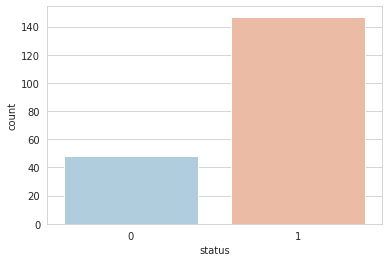

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x=df['status'],data=df,palette='RdBu_r')

In [ ]:
std_df['status'] = le.fit_transform(std_df['status'])
std_df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-1.723191,-0.746124,-0.444121,-1.456718,1.052196,0.890754,0.705656,1.379236,0.754506,1.120508,1.144795,0.967354,1.294087,0.897619,0.969856,0.745620,-0.390827,1,-0.941537,1.527778,1.012597,0.761587,-0.230943,1.172481
1,-1.705426,-0.568475,-0.550711,0.550711,1.319918,1.216640,1.214184,1.487457,1.204621,1.472896,1.570410,1.419217,1.607722,1.334480,1.409461,0.634049,-0.906008,1,-0.426357,1.652132,1.474483,1.352331,0.515181,1.527778
2,-1.687661,-0.959302,-1.048127,0.461886,1.422888,1.542525,1.422218,1.574033,1.400323,1.287429,1.357603,1.325079,1.441680,1.116050,1.317877,0.113383,-0.497416,1,-0.781654,1.723191,1.243540,1.173318,-0.088824,1.367894
3,-1.669897,-0.977067,-0.799419,0.444121,1.381700,1.542525,1.329758,1.509101,1.302472,1.361615,1.428539,1.381562,1.497028,1.188860,1.372827,0.187764,-0.515181,1,-0.692829,1.634367,1.438953,1.316529,0.142119,1.545543
4,-1.652132,-1.083656,-0.639535,0.408592,1.484671,2.194297,1.537793,1.617322,1.498174,1.509989,1.523120,1.532183,1.663070,1.425493,1.519362,0.355121,-0.728359,1,-0.906008,1.687661,1.545543,0.242448,-0.106589,1.616602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.652132,0.639535,0.959302,-0.390827,-0.183445,-0.412788,0.081554,-0.049282,0.108690,0.990681,1.073859,1.099148,1.091147,0.679189,1.098074,0.987358,-0.763889,0,-0.532946,-1.136951,-0.941537,-1.368672,0.994832,-0.941537
191,1.669897,1.367894,1.314599,-0.604005,0.372593,-0.412788,0.497622,0.210448,0.539234,0.322998,0.317210,0.477836,0.390081,0.060302,0.493617,0.448097,-0.888243,0,-0.728359,-0.692829,-0.586240,-1.314968,1.208010,-0.408592
192,1.687661,0.657300,1.154716,-1.510013,1.505265,1.216640,1.491563,1.400880,1.459033,0.007704,0.269920,-0.030510,-0.015800,-0.285547,-0.037573,1.601000,-1.225775,0,-1.012597,-1.208010,-1.136951,-1.082251,1.083656,-0.977067
193,1.705426,1.101421,1.545543,-1.474483,0.866850,-0.086903,0.705656,0.773198,0.754506,-0.029389,0.175339,-0.049338,-0.126495,-0.449370,-0.055890,1.470834,-0.959302,0,-0.497416,-1.421189,-1.119186,-0.222986,-0.692829,-1.030362


cek imbalance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

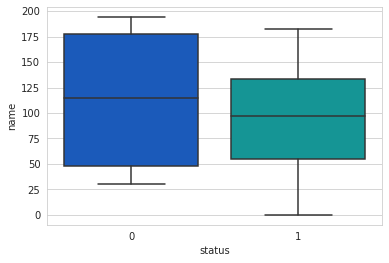

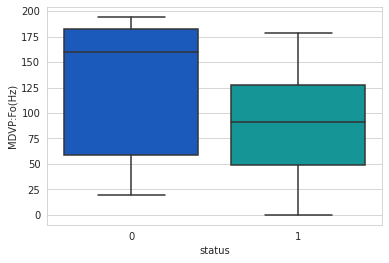

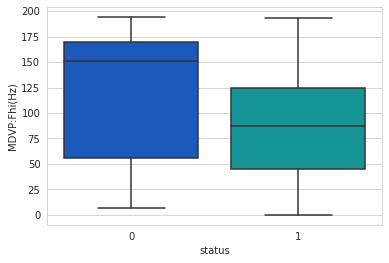

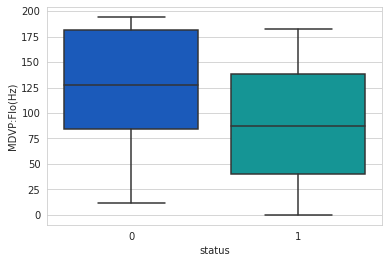

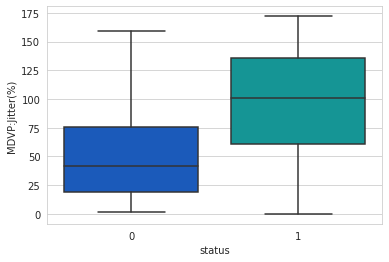

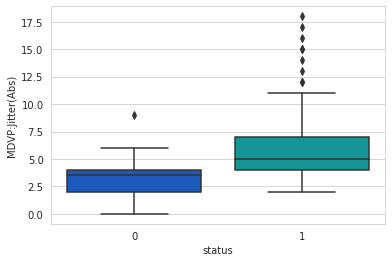

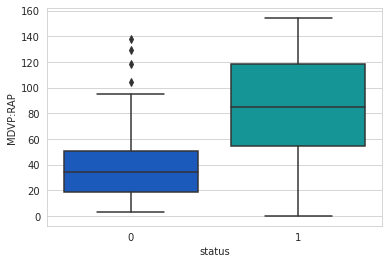

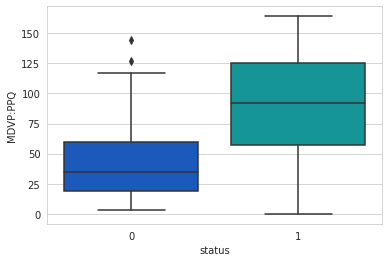

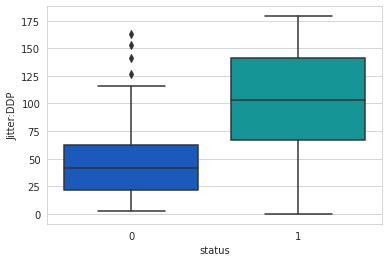

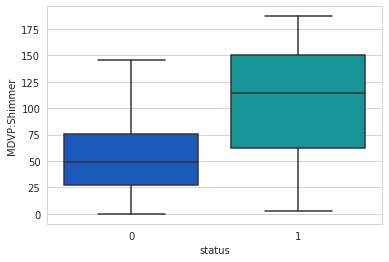

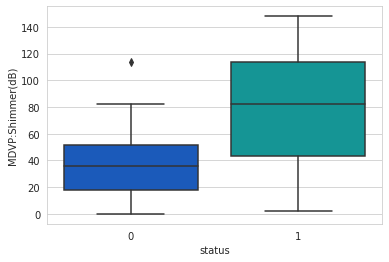

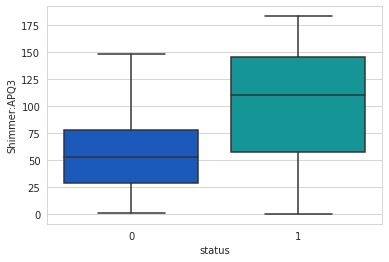

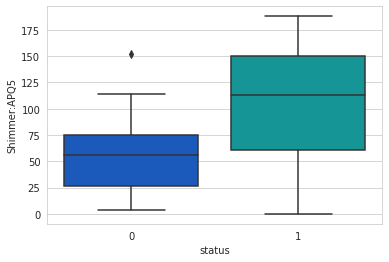

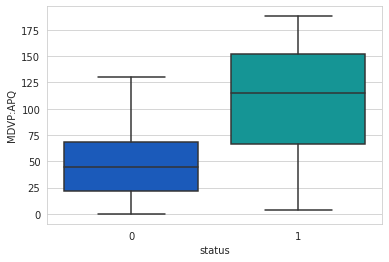

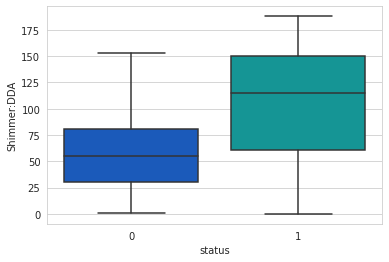

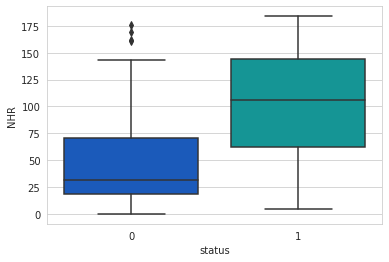

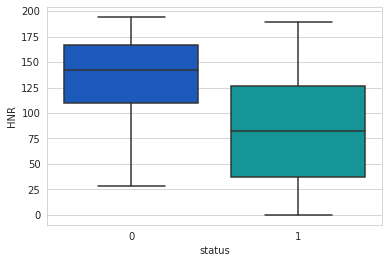

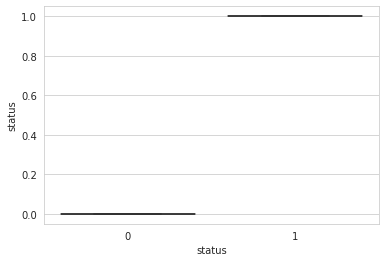

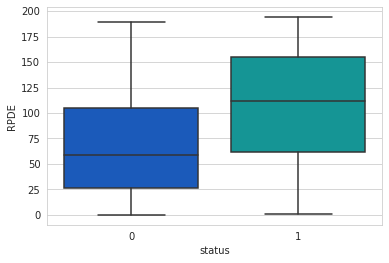

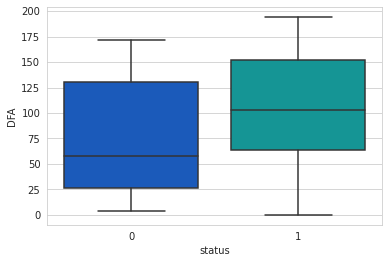

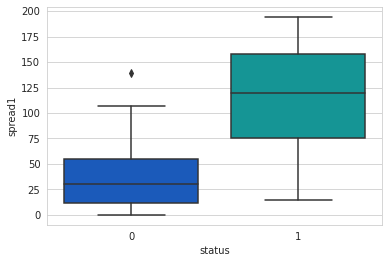

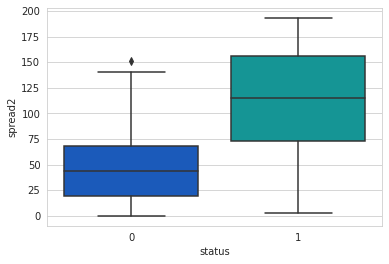

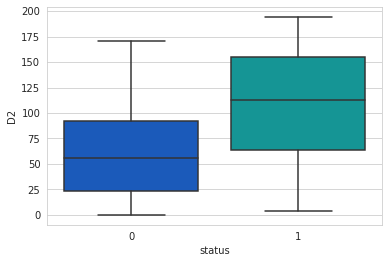

<Figure size 432x288 with 0 Axes>

In [ ]:
l=list(std_df.columns[0:24])
for i in range(len(l)-1):
    sns.boxplot(x='status',y=l[i], data=df, palette='winter')
    plt.figure()

In [ ]:
std_data = std_df

In [ ]:
std_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    float64
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Text(0.5, 1.0, 'spread2')

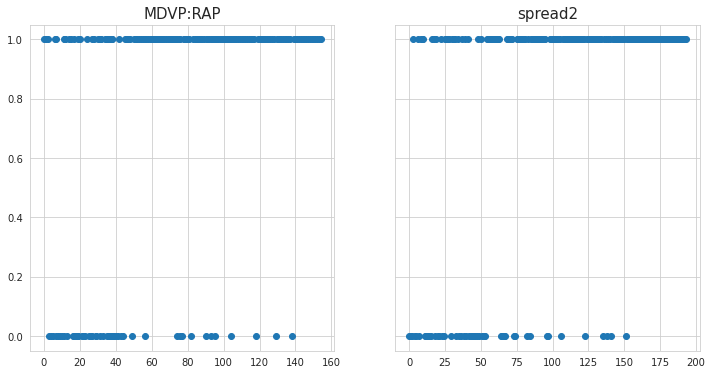

In [ ]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['MDVP:RAP'],df['status'])
ax1.set_title("MDVP:RAP", fontsize=15)
ax2.scatter(df['spread2'],df['status'])
ax2.set_title("spread2", fontsize=15)


Text(0.5, 1.0, 'Status tidak lengkap')

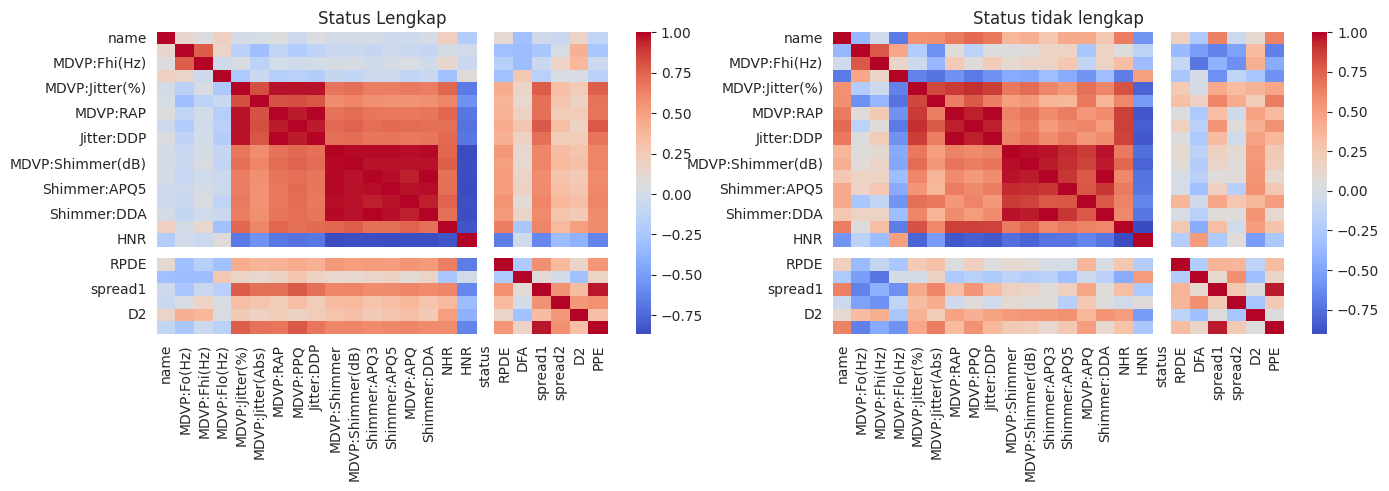

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df[df['status']==1][["name", "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "status", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"]].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Status Lengkap')
ax = sns.heatmap(df[df['status']==0][["name", "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "status", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"]].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Status tidak lengkap')

Split Data

In [ ]:
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(columns=['status']), df[['status']], test_size=0.33, random_state=69)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  130  | Jumlah Test Data :  65


Membangun model

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.get_params()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Predict test data

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Membuat konfusion matrix

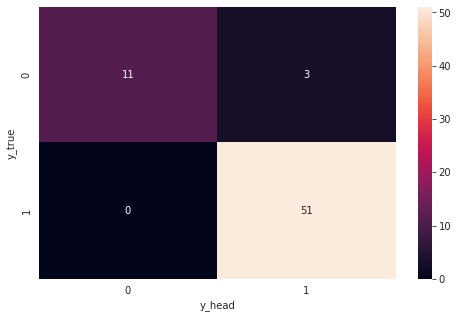

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

Akurasi dari random forest

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.94      1.00      0.97        51

    accuracy                           0.95        65
   macro avg       0.97      0.89      0.93        65
weighted avg       0.96      0.95      0.95        65



Interpretasi
dalam hal ini didapat akurasi 56% yang artinya nilai yang akan diprediksi akan sesuai dengan nilai sebenarnya dengan tingkat akurasi 56%.
Rasion benar positif yaitu sebesar 61% pada status kelas target tidak lengkap, rasio benar positif dari keseluruhan benar positif untuk kelas target status tidak lengkap yaitu sebesar 62% sisanya 48% untuk kelas target status lengkap.
Sedangkan perbandingan rata-rata precisi dan recall yaitu sebesar 62% untuk kelas target status tidak lengkap dan 49% untuk kelas target status lengkap.

Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   43.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
grid_search.best_params_

NameError: ignored

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

NameError: ignored

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, grid_predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,grid_predictions))

Mohon maaf untuk cross-validation sepertinya memakan waktu yang lama sehingga implementasinya tidak bisa dilakukan